In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Set date range

In [2]:
# specify the date range we wish to plot
date_range = pd.date_range('01-01-2006', datetime.today().date())

# Load csv

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/collective-action/tech/master/actions.csv")
df["date"] = pd.to_datetime(df["date"])  # cast date col to datetime64
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,1,1979-09-01,['https://twitter.com/clancynewyork/status/117...,['protest'],['ethics'],['white_collar_workers'],"IBM workers formed an organization, IBM: Speak...",None,['worldwide'],['ibm'],None,['international_solidarity'],['nataliyaned'],None,None
1,2,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],Fourteen employees at AT&T sign a letter warni...,None,['usa'],['at&t'],14,None,['nataliyaned'],"[(45.5733162, -122.5587111463347)]","['10025, Northeast Cascades Parkway, Portland,..."
2,3,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],"A group of computer professionals, led by Comp...",None,['usa'],None,30,None,['nataliyaned'],"[(39.7837304, -100.4458825)]",['United States']
3,4,1994-01-24,['https://www.nytimes.com/1994/06/12/magazine/...,['open_letter'],['ethics'],['white_collar_workers'],Computer Professionals for Social Responsibili...,True,None,None,50000,None,['nataliyaned'],None,None
4,5,1998-11-23,['http://www.cnn.com/tech/computing/9811/23/ms...,['legal_action'],"['unfair_labor_practices', 'pay_and_benefits']",['contract_workers'],A law firm representing 10 current and former ...,None,['usa'],['microsoft'],10,None,['organizejs'],"[(35.139622349999996, -80.92306993327955)]","['Microsoft, Yorkwood, Charlotte, Mecklenburg ..."


# Clean Text

In [46]:
df["struggles"] = df["struggles"].astype(str).str.strip("[]\'\'")
df["actions"] = df["actions"].astype(str).str.strip("[]\'\'")
df["companies"] = df["companies"].astype(str).str.strip("[]\'\'")
df["employment_types"] = df["employment_types"].astype(str).str.strip("[]\'\'")
df["sources"] = df["sources"].astype(str).str.strip("[]\'\'")
df["tags"] = df["tags"].astype(str).str.strip("[]\'\'")
df["locations"] = df["locations"].astype(str).str.strip("[]\'\'")

df["struggles"] = df["struggles"].astype(str).str.replace("'", "")
df["actions"] = df["actions"].astype(str).str.replace("'", "")
df["companies"] = df["companies"].astype(str).str.replace("'", "")
df["employment_types"] = df["employment_types"].astype(str).str.replace("'", "")
df["sources"] = df["sources"].astype(str).str.replace("'", "")
df["tags"] = df["tags"].astype(str).str.replace("'", "")
df["locations"] = df["locations"].astype(str).str.replace("'", "")

df["struggles"] = df["struggles"].astype(str).str.replace(" ", "")
df["actions"] = df["actions"].astype(str).str.replace(" ", "")
df["companies"] = df["companies"].astype(str).str.replace(" ", "")
df["employment_types"] = df["employment_types"].astype(str).str.replace(" ", "")
df["sources"] = df["sources"].astype(str).str.replace(" ", "")
df["tags"] = df["tags"].astype(str).str.replace(" ", "")
df["locations"] = df["locations"].astype(str).str.replace(" ", "")

In [47]:
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,1,1979-09-01,https://twitter.com/clancynewyork/status/11758...,protest,ethics,white_collar_workers,"IBM workers formed an organization, IBM: Speak...",None,worldwide,ibm,None,international_solidarity,['nataliyaned'],None,None
1,2,1986-09-16,https://www.nytimes.com/1986/09/16/science/sof...,open_letter,ethics,white_collar_workers,Fourteen employees at AT&T sign a letter warni...,None,usa,at&t,14,None,['nataliyaned'],"[(45.5733162, -122.5587111463347)]","['10025, Northeast Cascades Parkway, Portland,..."
2,3,1986-09-16,https://www.nytimes.com/1986/09/16/science/sof...,open_letter,ethics,white_collar_workers,"A group of computer professionals, led by Comp...",None,usa,None,30,None,['nataliyaned'],"[(39.7837304, -100.4458825)]",['United States']
3,4,1994-01-24,https://www.nytimes.com/1994/06/12/magazine/ba...,open_letter,ethics,white_collar_workers,Computer Professionals for Social Responsibili...,True,None,None,50000,None,['nataliyaned'],None,None
4,5,1998-11-23,http://www.cnn.com/tech/computing/9811/23/mste...,legal_action,"unfair_labor_practices,pay_and_benefits",contract_workers,A law firm representing 10 current and former ...,None,usa,microsoft,10,None,['organizejs'],"[(35.139622349999996, -80.92306993327955)]","['Microsoft, Yorkwood, Charlotte, Mecklenburg ..."


# Visualizations

In [75]:
def vizcolumn(df, col, limit = None):
    lst = []
    for i in df[col].unique():
        lst.extend(i.split(","))
        
    lst = list(set(lst))
        
    count = []
    for i in lst:
        count.append(sum(df[col].str.contains(i)))
        
    if limit:
        sorted_list = sorted(zip(lst, count), key = lambda x: x[1], reverse = True)
        sorted_list = sorted_list[:limit]
        
        lst, count = [], []
        for i, j in sorted_list:
            lst.append(i)
            count.append(j)
        
    col_df = pd.DataFrame({col: lst, "count": count})
    
    col_df.plot(kind = "barh", x = col, y = "count", title = "Number of Occurrence by " + col)
    plt.show()

## Actions

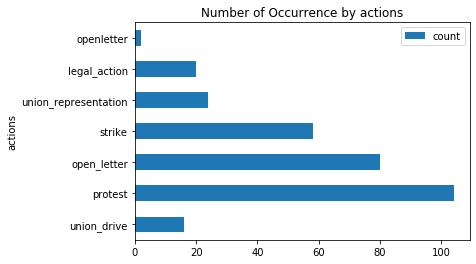

In [69]:
vizcolumn(df, "actions")

In [7]:
df.groupby("actions").count()["id"]

actions
['legal_action', 'protest']                 1
['legal_action']                           17
['open_letter', 'legal_action']             1
['open_letter', 'protest']                  2
['open_letter', 'strike']                   4
['open_letter']                            65
['protest', 'open_letter']                  4
['protest', 'strike']                       2
['protest']                                90
['strike', 'open_letter']                   1
['strike', 'protest']                       5
['strike', 'union_drive']                   1
['strike']                                 45
['union_drive']                            14
['union_representation', 'union_drive']     1
['union_representation']                   22
Name: id, dtype: int64

In [52]:
actions_df = pd.DataFrame({"Actions": actions, "Count": actions_count})
actions_df.head()

,Actions,Count
0,protest,104
1,open_letter,80
2,legal_action,20
3,union_drive,16
4,union_representation,24


## Employment Types

In [26]:
df.groupby(["employment_types"]).count()["id"]

employment_types
['blue_collar_workers', 'contract_workers']                    7
['blue_collar_workers', 'gig_workers']                         2
['blue_collar_workers', 'in_house_workers']                    9
['blue_collar_workers', 'white_collar_workers']                1
['blue_collar_workers']                                       37
['contract_workers', 'blue_collar_workers']                    5
['contract_workers', 'gig_workers']                            4
['contract_workers', 'white_collar_workers']                   1
['contract_workers']                                          12
['gig_workers', 'blue_collar_workers']                         1
['gig_workers']                                               60
['in_house_workers', 'blue_collar_workers', 'gig_workers']     1
['in_house_workers', 'blue_collar_workers']                    8
['in_house_workers']                                           2
['na']                                                        30
['white_

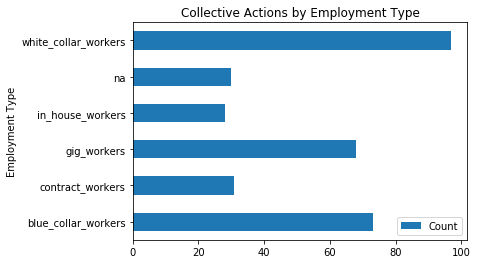

In [28]:
workers = ['blue_collar_workers', 'contract_workers', 'gig_workers', 'in_house_workers', 'na', 'white_collar_workers']

workers_count = []
for w in workers:
    workers_count.append(sum(df["employment_types"].str.contains(w)))
    
workers_df = pd.DataFrame({"Employment Type": workers, "Count": workers_count})

workers_df.plot(kind = "barh", x = "Employment Type", y = "Count", title = "Collective Actions by Employment Type")
plt.show()

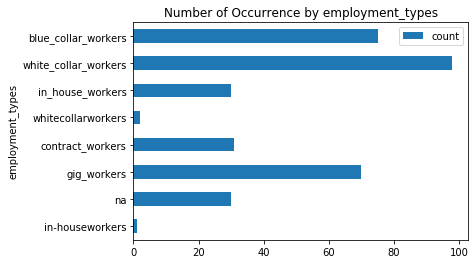

In [62]:
vizcolumn(df, "employment_types")

## Struggles

In [34]:
df.groupby(["struggles"]).count()["id"].index

Index(['['discrimination', 'ethics']',
       '['discrimination', 'pay_and_benefits']', '['discrimination']',
       '['ethics', 'discrimination']',
       '['ethics', 'working conditions', 'unfair_labor_practices']',
       '['ethics', 'working conditions']', '['ethics']',
       '['job_security', 'discrimination']',
       '['job_security', 'pay_and_benefits']',
       '['job_security', 'working conditions', 'pay_and_benefits']',
       '['job_security']', '['na']', '['pay_and_benefits', 'discrimination']',
       '['pay_and_benefits', 'job_security']',
       '['pay_and_benefits', 'unfair_labor_practices']',
       '['pay_and_benefits', 'working conditions', 'unfair_labor_practices']',
       '['pay_and_benefits', 'working conditions']', '['pay_and_benefits']',
       '['unfair_labor_practices', 'job_security']',
       '['unfair_labor_practices', 'pay_and_benefits']',
       '['unfair_labor_practices']',
       '['working conditions', 'discrimination']',
       '['working condition

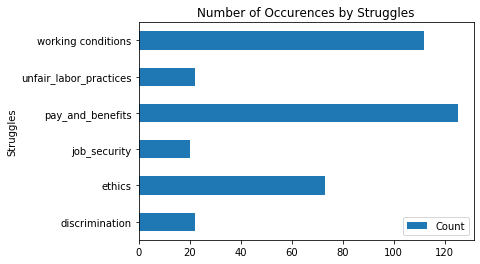

In [35]:
struggles = ['discrimination', 'ethics', 'job_security', 'pay_and_benefits', 
             'unfair_labor_practices', 'working conditions']

struggles_count = []
for s in struggles:
    struggles_count.append(sum(df["struggles"].str.contains(s)))
    
struggles_df = pd.DataFrame({"Struggles": struggles, "Count": struggles_count})

struggles_df.plot(kind = "barh", x = "Struggles", y = "Count", title = "Number of Occurences by Struggles")
plt.show()

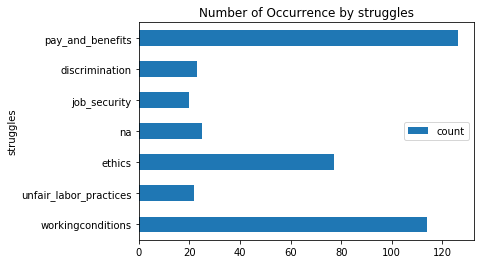

In [63]:
vizcolumn(df, "struggles")

## Workers

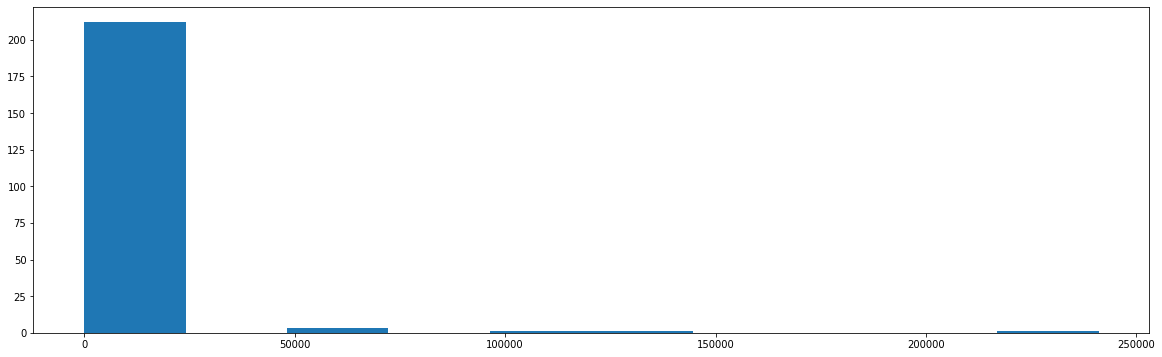

In [77]:
plt.figure(figsize = (20, 6))
workers_as_int = [int(i) for i in df[~(df["workers"] == "None")]["workers"].values]
plt.hist(workers_as_int)
plt.show()

## Companies

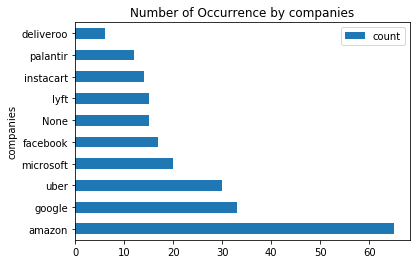

In [76]:
vizcolumn(df, "companies", limit = 10)

## Tags

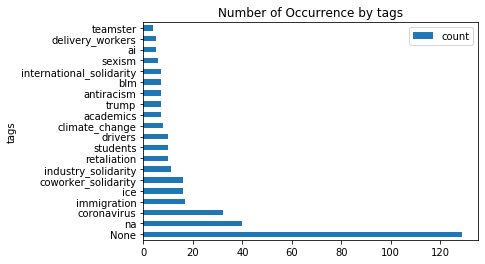

In [78]:
vizcolumn(df, "tags", limit = 20)

## Locations

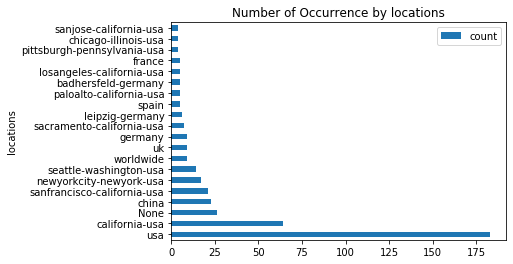

In [81]:
vizcolumn(df, "locations", limit = 20)

## Addresses

In [84]:
df.groupby(["addresses"]).count()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs
addresses,,,,,,,,,,,,,,
None,89,89,89,89,89,89,89,89,89,89,89,89,89,89
"[""Amazon.fr ORY1, Rue de l'Olivier, Deret Logistique, Saran, Orléans, Loiret, Centre-Val de Loire, France métropolitaine, 45770, France"", 'Amazon, Rue de Charenton, Quartier de Bercy, Paris, Île-de-France, France métropolitaine, 75012, France']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"[""Amazon.fr ORY1, Rue de l'Olivier, Deret Logistique, Saran, Orléans, Loiret, Centre-Val de Loire, France métropolitaine, 45770, France""]",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['1, 东长安街, 北京市, 东城区, 北京市, 100010, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['10025, Northeast Cascades Parkway, Portland, Multnomah County, Oregon, 97220, United States of America']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['华三通信, 长河街道, 杭州市, 浙江省, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['华为技术有限公司, 龙岗区, 深圳市, 广东省, 518100, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['甲骨文大厦, 软件园三号路, 中关村软件园, 东北旺村, 海淀区, 北京市, 100093, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
